In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 7.5
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

c:\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
c:\Anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [100]:
jp = pd.read_csv("Jobplanet_rating.csv", encoding="utf-8")
b = pd.read_csv("Blind_rating.csv", encoding="utf-8")

In [30]:
corp_info = pd.read_csv("main_fs.csv", encoding="euc-kr", sep=';')[['corp', 'stock_code', 'sector']].drop_duplicates()
corp_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 635
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   corp        636 non-null    object
 1   stock_code  636 non-null    int64 
 2   sector      636 non-null    object
dtypes: int64(1), object(2)
memory usage: 19.9+ KB


In [34]:
jp_merged = pd.merge(corp_info, jp[jp.columns[1:]], how='left', on=['stock_code'])
jp_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 635
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   corp         636 non-null    object 
 1   stock_code   636 non-null    int64  
 2   sector       636 non-null    object 
 3   잡플래닛평점       636 non-null    float64
 4   복지 및 급여      636 non-null    float64
 5   업무와 삶의 균형    636 non-null    float64
 6   사내문화         636 non-null    float64
 7   승진 기회 및 가능성  636 non-null    float64
 8   경영진          636 non-null    float64
 9   기업추천율        636 non-null    float64
 10  CEO지지율       636 non-null    float64
 11  성장가능성        636 non-null    float64
 12  잡플래닛개수       636 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 69.6+ KB


In [101]:
b_merged = pd.merge(corp_info, b[b.columns[1:]], how='left', on=['stock_code'])
b_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 635
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   corp        636 non-null    object 
 1   stock_code  636 non-null    int64  
 2   sector      636 non-null    object 
 3   블라인드평점      635 non-null    float64
 4   블라인드개수      635 non-null    float64
 5   커리어 향상      635 non-null    float64
 6   업무와 삶의 균형   635 non-null    float64
 7   급여 및 복지     635 non-null    float64
 8   사내 문화       635 non-null    float64
 9   경영진         635 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 54.7+ KB


In [102]:
# 0값(결측치)의 경우 점수 0점으로 계산되지 않도록 np.NaN값으로 대체
jp_naned = jp_merged.replace(0, np.NaN)
b_naned = b_merged.replace(0, np.NaN)

### Jobplanet

C:\Users\junel\AppData\Local\Temp\ipykernel_17232\656442090.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(jp_merged[jp_merged.columns[2:]].corr(), annot=True)


<AxesSubplot: >

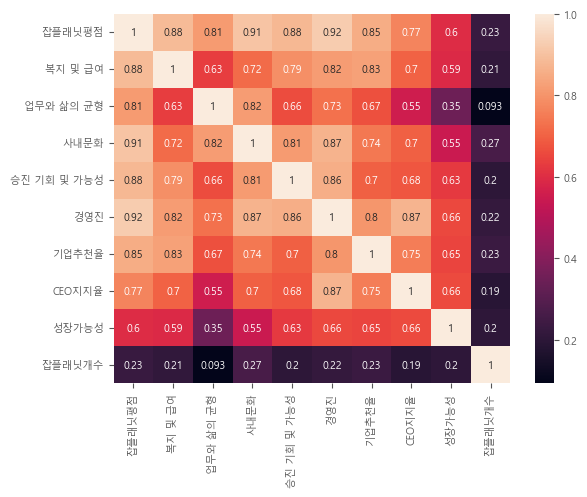

In [46]:
sns.heatmap(jp_merged[jp_merged.columns[2:]].corr(), annot=True)

C:\Users\junel\AppData\Local\Temp\ipykernel_17232\3541115902.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(jp_naned[jp_naned.columns[2:]].corr(), annot=True)


<AxesSubplot: >

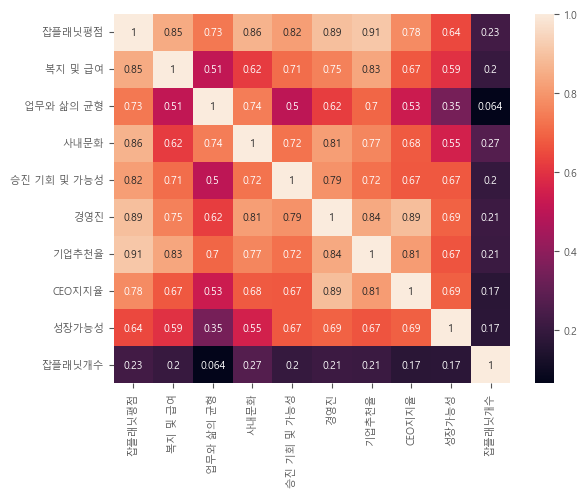

In [106]:
sns.heatmap(jp_naned[jp_naned.columns[2:]].corr(), annot=True)

별점 개수와 별점 간의 상관관계는 크지 않음.

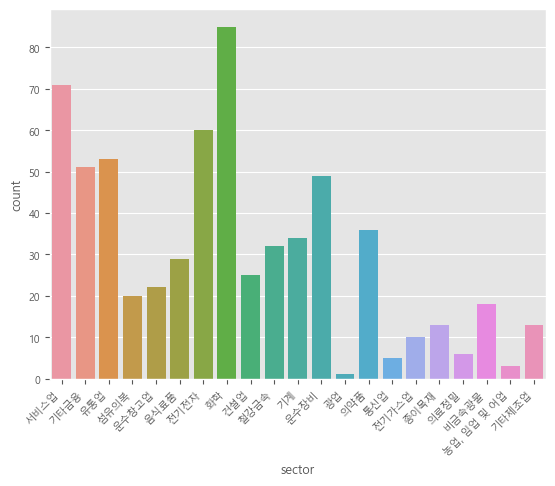

In [ ]:
jp_cnt_sector = sns.countplot(jp_naned, x='sector')
jp_cnt_sector.set_xticklabels(jp_cnt_sector.get_xticklabels(), rotation=45,horizontalalignment='right')
None

In [118]:
jp_by_sector = jp_naned.groupby('sector').mean()
jp_by_sector.reset_index(inplace=True)
jp_by_sector.drop('stock_code', axis=1, inplace=True)
jp_by_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sector       21 non-null     object 
 1   잡플래닛평점       21 non-null     float64
 2   복지 및 급여      21 non-null     float64
 3   업무와 삶의 균형    21 non-null     float64
 4   사내문화         21 non-null     float64
 5   승진 기회 및 가능성  21 non-null     float64
 6   경영진          21 non-null     float64
 7   기업추천율        20 non-null     float64
 8   CEO지지율       20 non-null     float64
 9   성장가능성        20 non-null     float64
 10  잡플래닛개수       21 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.9+ KB


C:\Users\junel\AppData\Local\Temp\ipykernel_17232\437236666.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  jp_by_sector = jp_naned.groupby('sector').mean()


In [119]:
jp_naned['잡플래닛평점'].mean()

2.8273599999999997

In [120]:
jp_by_sector['잡플래닛평점'].mean()

2.735643781373522

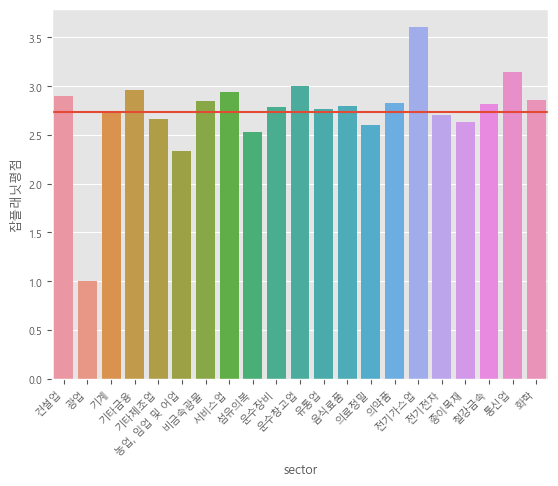

In [121]:
jp_rating_by_sector = sns.barplot(by_sector, x='sector', y='잡플래닛평점')
jp_rating_by_sector.set_xticklabels(jp_rating_by_sector.get_xticklabels(), rotation=45,horizontalalignment='right')
jp_rating_by_sector.axhline(y=2.735643781373522)
None

### blind

C:\Users\junel\AppData\Local\Temp\ipykernel_17232\4161508177.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(b_merged[b_merged.columns[2:]].corr(), annot=True)


<AxesSubplot: >

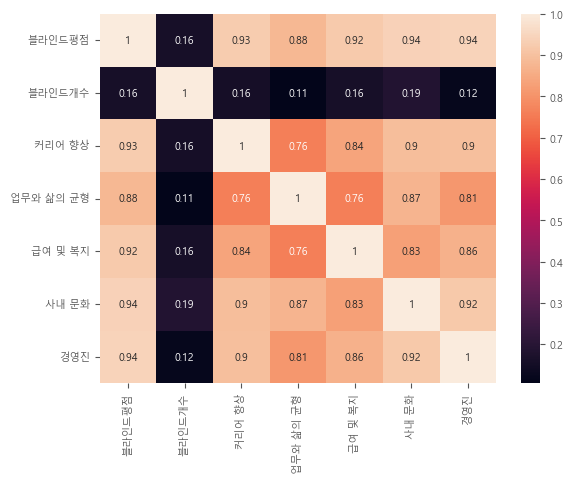

In [103]:
sns.heatmap(b_merged[b_merged.columns[2:]].corr(), annot=True)

C:\Users\junel\AppData\Local\Temp\ipykernel_17232\3740102337.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(b_naned[b_naned.columns[2:]].corr(), annot=True)


<AxesSubplot: >

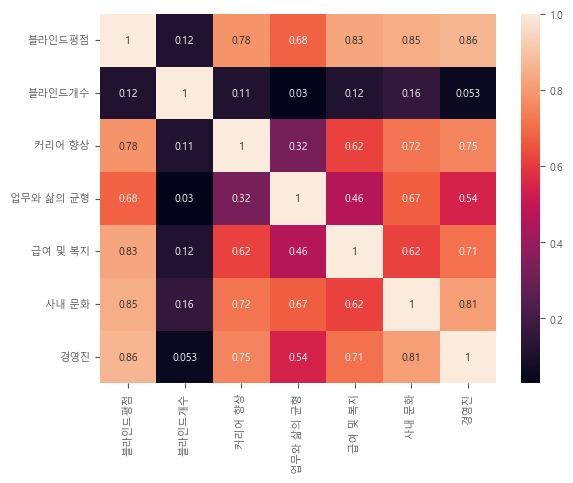

In [104]:
sns.heatmap(b_naned[b_naned.columns[2:]].corr(), annot=True)

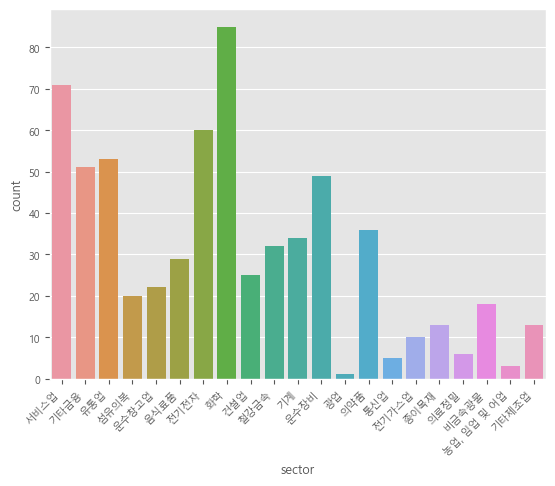

In [151]:
b_cnt_sector = sns.countplot(b_naned, x='sector')
b_cnt_sector.set_xticklabels(b_cnt_sector.get_xticklabels(), rotation=45,horizontalalignment='right')
None

In [113]:
b_by_sector = b_naned.groupby('sector').mean()
b_by_sector.reset_index(inplace=True)
b_by_sector.drop('stock_code', axis=1, inplace=True)
b_by_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sector     21 non-null     object 
 1   블라인드평점     21 non-null     float64
 2   블라인드개수     21 non-null     float64
 3   커리어 향상     21 non-null     float64
 4   업무와 삶의 균형  21 non-null     float64
 5   급여 및 복지    21 non-null     float64
 6   사내 문화      21 non-null     float64
 7   경영진        21 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.4+ KB


C:\Users\junel\AppData\Local\Temp\ipykernel_17232\929418033.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b_by_sector = b_naned.groupby('sector').mean()


In [114]:
b_naned['블라인드평점'].mean()

2.864237288135593

In [115]:
b_by_sector['블라인드평점'].mean()

2.925641956806577

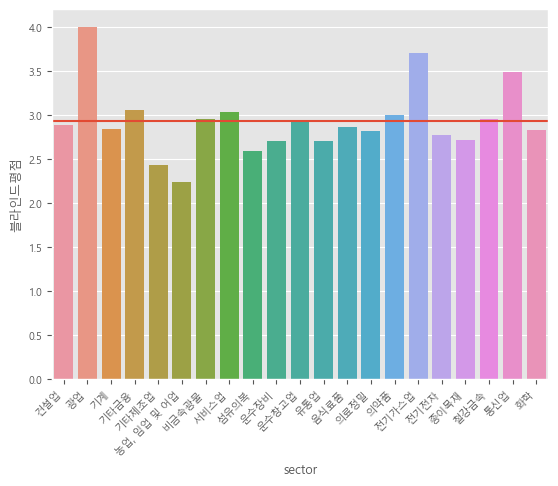

In [117]:
b_rating_by_sector = sns.barplot(b_by_sector, x='sector', y='블라인드평점')
b_rating_by_sector.set_xticklabels(b_rating_by_sector.get_xticklabels(), rotation=45,horizontalalignment='right')
b_rating_by_sector.axhline(y=2.925641956806577)
None

### 합쳐서 보자

In [125]:
merged_by_sector = pd.merge(jp_by_sector[['sector', '잡플래닛평점']], b_by_sector[['sector', '블라인드평점']], on = 'sector')
merged_by_sector.head(2)

,sector,잡플래닛평점,블라인드평점
0,건설업,2.896,2.884
1,광업,1.000,4.000


In [139]:
test = merged_by_sector.set_index('sector').stack().reset_index().rename(columns={'level_1':'type', 0:'value'})

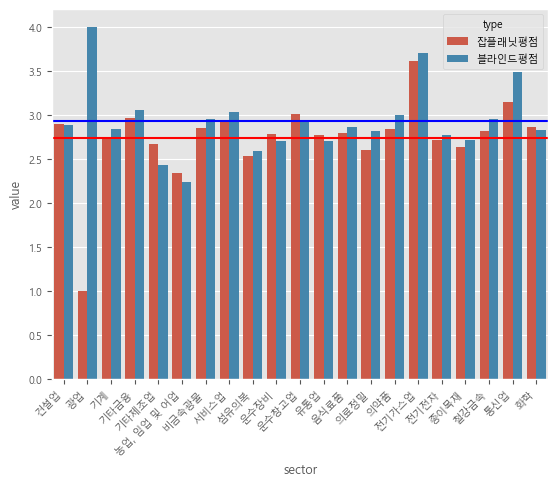

In [141]:
rating_by_sector = sns.barplot(test, x='sector', y='value', hue='type')
rating_by_sector.set_xticklabels(rating_by_sector.get_xticklabels(), rotation=45,horizontalalignment='right')
rating_by_sector.axhline(y=2.735643781373522, color='r') #잡플래닛
rating_by_sector.axhline(y=2.925641956806577, color='b') #블라인드

None

대부분 비슷한 추이를 보였으나, 광업의 경우 편차가 크게 나타나는 것 데이터로 확인 필요

In [142]:
jp_naned[jp_naned['sector']=='광업']

,corp,stock_code,sector,잡플래닛평점,복지 및 급여,업무와 삶의 균형,사내문화,승진 기회 및 가능성,경영진,기업추천율,CEO지지율,성장가능성,잡플래닛개수
38,HLB글로벌,3580,광업,1.0,1.0,2.5,1.0,1.5,1.0,NaN,NaN,NaN,2.0


In [143]:
b_naned[b_naned['sector']=='광업']

,corp,stock_code,sector,블라인드평점,블라인드개수,커리어 향상,업무와 삶의 균형,급여 및 복지,사내 문화,경영진
38,HLB글로벌,3580,광업,4.0,2.0,3.0,3.0,2.5,2.5,2.0


광업의 경우 'HLB글로벌' 레코드 하나 뿐임으로 편차가 크게 나타나는 것을 확인